In [66]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

## Get market data for past year

In [67]:
START = "2023-09-01"
END = "2024-09-01"
ticker = "QQQ"

# spy = yf.Ticker("SPY")

stock_df = yf.download(ticker, start=START, end=END)
stock_df = stock_df.xs(ticker, level='Ticker', axis=1)


stock_df['time_published'] = stock_df.index
stock_df['time_published'] = pd.to_datetime(stock_df['time_published'])
stock_df['time_published'] = stock_df['time_published'].dt.date
display(stock_df)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,time_published
Date,,,,,,,
2023-09-01 00:00:00+00:00,374.475830,377.589996,380.829987,376.079987,380.399994,39772400,2023-09-01
2023-09-05 00:00:00+00:00,374.951874,378.070007,379.309998,375.829987,376.769989,32344200,2023-09-05
2023-09-06 00:00:00+00:00,371.649353,374.739990,377.630005,372.700012,377.279999,42998700,2023-09-06
2023-09-07 00:00:00+00:00,368.991425,372.059998,372.850006,369.149994,370.209991,52060700,2023-09-07
2023-09-08 00:00:00+00:00,369.507172,372.579987,374.850006,371.600006,372.010010,35800100,2023-09-08
...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,474.672974,475.339996,480.380005,473.239990,479.450012,27452600,2024-08-26
2024-08-27 00:00:00+00:00,476.090973,476.760010,477.839996,471.709991,473.690002,27510000,2024-08-27
2024-08-28 00:00:00+00:00,470.688568,471.350006,477.019989,467.890015,476.290009,37372400,2024-08-28


In [68]:
print(stock_df.index)
# fig = plt.figure(figsize=(10,6))
# plt.title(f"{ticker} close price against date from 2022-09-01 to 2024-09-01")
# plt.plot(df.index, df['Adj Close'], label="Adj Close", color="blue")
# quarter_starts = pd.to_datetime(["2022-09-01", "2022-12-31", "2023-03-31", "2023-06-30",
#                                   "2023-09-30", "2023-12-31", "2024-03-31", "2024-06-30", "2024-09-30"])

# for date in quarter_starts:
#     plt.axvline(x=date, color='red', linestyle='--', linewidth=0.8)


# plt.savefig('QQQ_price.png')

DatetimeIndex(['2023-09-01 00:00:00+00:00', '2023-09-05 00:00:00+00:00',
               '2023-09-06 00:00:00+00:00', '2023-09-07 00:00:00+00:00',
               '2023-09-08 00:00:00+00:00', '2023-09-11 00:00:00+00:00',
               '2023-09-12 00:00:00+00:00', '2023-09-13 00:00:00+00:00',
               '2023-09-14 00:00:00+00:00', '2023-09-15 00:00:00+00:00',
               ...
               '2024-08-19 00:00:00+00:00', '2024-08-20 00:00:00+00:00',
               '2024-08-21 00:00:00+00:00', '2024-08-22 00:00:00+00:00',
               '2024-08-23 00:00:00+00:00', '2024-08-26 00:00:00+00:00',
               '2024-08-27 00:00:00+00:00', '2024-08-28 00:00:00+00:00',
               '2024-08-29 00:00:00+00:00', '2024-08-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=251, freq=None)


In [69]:
news_df = pd.read_csv('technology_news_data_50Daily.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
display(news_df)

,title,url,time_published,source,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,Sono Group Receives Additional Staff Determina...,https://www.globenewswire.com/news-release/202...,2023-09-01,GlobeNewswire,0.047543,Neutral,"[{'ticker': 'SEV', 'relevance_score': '0.10945..."
1,CNH Industrial: Periodic Report on $300 Millio...,https://www.globenewswire.com/news-release/202...,2023-09-01,GlobeNewswire,0.312457,Somewhat-Bullish,"[{'ticker': 'RGBD', 'relevance_score': '0.0986..."
2,CytoSorbents Announces Resignation of Chief Fi...,https://www.globenewswire.com/news-release/202...,2023-09-01,GlobeNewswire,0.121210,Neutral,"[{'ticker': 'META', 'relevance_score': '0.0735..."
3,CytoSorbents Announces Resignation of Chief Fi...,https://www.benzinga.com/pressreleases/23/09/g...,2023-09-01,Benzinga,0.116318,Neutral,"[{'ticker': 'META', 'relevance_score': '0.0709..."
4,Positioning for a Year End Rally: 3 Top Ranked...,https://www.zacks.com/commentary/2143938/posit...,2023-09-01,Zacks Commentary,0.296182,Somewhat-Bullish,"[{'ticker': 'LRCX', 'relevance_score': '0.2589..."
...,...,...,...,...,...,...,...
18345,"ROSEN, TRUSTED INVESTOR COUNSEL, Encourages NA...",https://www.benzinga.com/pressreleases/24/09/g...,2024-09-01,Benzinga,0.132603,Neutral,"[{'ticker': 'NNE', 'relevance_score': '0.24658..."
18346,Windows previews 'Intelligent Media Search' th...,https://cointelegraph.com/news/windows-preview...,2024-09-01,Cointelegraph,0.103330,Neutral,"[{'ticker': 'MSFT', 'relevance_score': '0.3829..."
18347,"1 ""Magnificent Seven"" Stock That Could Go Para...",https://www.fool.com/investing/2024/09/01/1-ma...,2024-09-01,Motley Fool,0.232959,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.0506..."
18348,"ROSEN, GLOBAL INVESTOR COUNSEL, Encourages Mod...",https://www.benzinga.com/pressreleases/24/09/g...,2024-09-01,Benzinga,0.132128,Neutral,"[{'ticker': 'MRNA', 'relevance_score': '0.2510..."


In [70]:
df1 = stock_df[['time_published', 'Adj Close', 'Open']]
df2 = news_df[['time_published', 'source', 'overall_sentiment_score']]
average_sentiment_df = df2.groupby(['time_published', 'source'], as_index=False)['overall_sentiment_score'].mean()
average_sentiment_df.rename(columns={'overall_sentiment_score': 'average sentiment score'}, inplace=True)
pivot_df = average_sentiment_df.pivot(index='time_published', columns='source', values='average sentiment score')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(-1, inplace=True)
combined_df = pd.merge(df1, pivot_df, on='time_published', how='inner')
# # combined_df['time_published'] = pd.to_datetime(combined_df['time_published'])
# # combined_df['time_published'] = (combined_df['time_published'] - pd.to_datetime('1970-01-01')).dt.days
# df_encoded = pd.get_dummies(combined_df, columns=['source'])
# display(df_encoded)
display(combined_df)

,time_published,Adj Close,Open,Al Jareeza,Associated Press,Barrons,Benzinga,Business Insider,Business Standard,CNBC,...,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,2023-09-01,374.475830,380.399994,-1.0,0.011936,0.152958,0.173515,0.156254,-1.000000,-0.108245,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.193063
1,2023-09-05,374.951874,376.769989,-1.0,-0.043037,-1.000000,0.224852,0.113085,-1.000000,0.080024,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.204264
2,2023-09-06,371.649353,377.279999,-1.0,0.062341,0.097872,0.255724,0.073166,-1.000000,-0.037002,...,-1.0,-1.0,0.114045,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.175756
3,2023-09-07,368.991425,370.209991,-1.0,0.230936,-1.000000,0.206763,-0.019377,-1.000000,-0.107900,...,-1.0,-1.0,0.159195,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.214652
4,2023-09-08,369.507172,372.010010,-1.0,-0.041194,-1.000000,0.163066,0.079105,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.0,-1.0,0.209266,-1.0,-1.0,-1.0,0.198217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-08-26,474.672974,479.450012,-1.0,-1.000000,-1.000000,0.195866,-1.000000,-1.000000,0.125910,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.169621
247,2024-08-27,476.090973,473.690002,-1.0,-1.000000,-1.000000,0.190242,-1.000000,-1.000000,0.077878,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.176734
248,2024-08-28,470.688568,476.290009,-1.0,-1.000000,-1.000000,0.215394,-1.000000,-1.000000,0.243668,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.170518
249,2024-08-29,469.999542,473.279999,-1.0,-1.000000,-1.000000,0.212961,-1.000000,0.086343,0.087253,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.176690


In [71]:
combined_df.to_csv('processed_data.csv', index=False)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X = combined_df.drop(['Adj Close', 'time_published'], axis=1)
y = combined_df["Adj Close"]

X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
    X, y, combined_df['time_published'], test_size=0.2, random_state=506
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [88]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# tf.random.set_seed(506)

# model = Sequential([
#     Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),  # 40 features
#     Dropout(0.3),
#     Dense(units=32, activation='relu'),
#     Dropout(0.3),
#     Dense(units=1)  # Output layer for price prediction
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Step 5: Train the Model
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

In [89]:
# loss, mae = model.evaluate(X_test, y_test, verbose=0)
# print(f"Mean Absolute Error on test data: {mae}")

In [75]:
# model = MLPRegressor(
#     hidden_layer_sizes=(100, 75, 50),  # Two hidden layers with 100 and 50 neurons
#     activation='relu',            # Activation function
#     solver='adam',                # Optimizer
#     learning_rate='adaptive',     # Adjust learning rate during training
#     max_iter=1000,                 # Maximum epochs
#     random_state=506
# )
# model.fit(X_train, y_train)

In [76]:
# y_pred = model.predict(X_test)

# # Evaluate the model (using metrics like Mean Squared Error, R-squared, etc.)
# from sklearn.metrics import mean_squared_error, r2_score
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [91]:
!pip install xgboost

In [93]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,         # Number of trees
    max_depth=5,              # Maximum depth of trees
    learning_rate=0.01,       # Lower learning rate for better generalization
    subsample=0.8,            # Randomly sample 80% of data for training each tree
    colsample_bytree=0.8,     # Randomly sample 80% of features for training each tree
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=0.1,           # L2 regularization
    random_state=506
)

# Fit the model
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)


[0]	validation_0-rmse:39.71357	validation_1-rmse:44.01217
[1]	validation_0-rmse:39.32493	validation_1-rmse:43.61661
[2]	validation_0-rmse:38.93481	validation_1-rmse:43.20644
[3]	validation_0-rmse:38.55015	validation_1-rmse:42.79987
[4]	validation_0-rmse:38.17401	validation_1-rmse:42.40929
[5]	validation_0-rmse:37.79741	validation_1-rmse:42.01725
[6]	validation_0-rmse:37.42758	validation_1-rmse:41.63131
[7]	validation_0-rmse:37.06207	validation_1-rmse:41.25680
[8]	validation_0-rmse:36.70064	validation_1-rmse:40.88148
[9]	validation_0-rmse:36.33943	validation_1-rmse:40.50201
[10]	validation_0-rmse:35.97994	validation_1-rmse:40.13686
[11]	validation_0-rmse:35.62492	validation_1-rmse:39.76729
[12]	validation_0-rmse:35.27752	validation_1-rmse:39.40882
[13]	validation_0-rmse:34.93352	validation_1-rmse:39.05005
[14]	validation_0-rmse:34.59410	validation_1-rmse:38.70152
[15]	validation_0-rmse:34.34940	validation_1-rmse:38.48970
[16]	validation_0-rmse:34.01080	validation_1-rmse:38.13894
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=506, ...)

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 47.25173857862897
R-squared: 0.9750822570214648


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


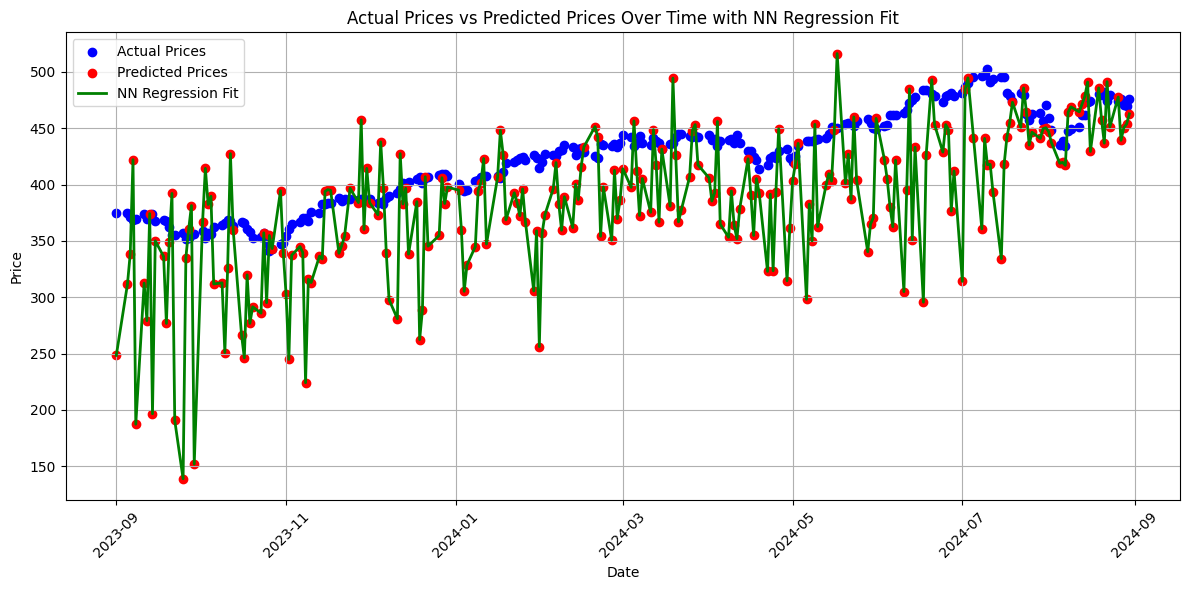

In [99]:
scaled_X = scaler.fit_transform(X)
predictions_df = combined_df.copy()
predictions_df['predicted_price'] = model.predict(scaled_X)
fitted_values = model.predict(scaled_X)

plt.figure(figsize=(12, 6))

# Plot actual prices
plt.scatter(predictions_df['time_published'], y, color='blue', label='Actual Prices')

# Plot predicted prices
plt.scatter(predictions_df['time_published'], predictions_df['predicted_price'], color='red', label="Predicted Prices")

# Plot the linear regression fit line
plt.plot(predictions_df['time_published'], fitted_values, color='green', label='NN Regression Fit', linestyle='-', linewidth=2)

# Formatting the plot
plt.title('Actual Prices vs Predicted Prices Over Time with NN Regression Fit')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()